# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
# enter user's key into api_key file
from api_keys import weather_api_key
if weather_api_key == "YOUR KEY HERE!":
    import sys
    path = "/Users/matth/Desktop"
    sys.path.insert(0, path)
    from API_Keys import api_key
    weather_api_key= api_key["https://openweathermap.org/"]

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#import pretty print
import pprint as pprint

#for date title in plots and filenames
from datetime import datetime

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?" 
#build url with a few other params, api key, and units imperial for temp in F and windspeed in mph.
query_url = base_url + "appid=" + weather_api_key +"&units=imperial&q="

In [4]:
#set min number of cities needed
citymin = 500



# initialize lists for data storage
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
Lat=[]
Long=[]
# include a list of cities that error out.
city_not_found=[]
#initialize count how many cities we've found weather data for.
citycount=0
#check if we have enough cities, if not, abort. if so, proceed to for loop.
if len(cities)<citymin:
    print("-----------------------------")
    print(f"Data Retrieval Aborted.")
    print(f"Rerun Generate Cities List to ensure >{citymin} cities.")
    print("-----------------------------")
else:
    print("Beginning Data Retrieval")     
    print("-----------------------------")
    #begin for loop to store records for each city
    for city in cities:
        try:
            city_url = query_url + city
            response = requests.get(city_url).json()
            # Add a one second interval between queries to (hopefully) stay within API query limits
            time.sleep(.5)
            # Use response to generate lists.
            Max_Temp.append(response["main"]["temp_max"]) 
            Humidity.append(response["main"]["humidity"])
            Cloudiness.append(response["clouds"]["all"])
            Wind_Speed.append(response["wind"]["speed"])
            Country.append(response["sys"]["country"])
            Date.append(response["dt"])
            Lat.append(response["coord"]["lat"])
            Long.append(response["coord"]["lon"])
            citycount=citycount+1
            print(f"processing record number {citycount} for | {city}")
        except:
            print(f"City: {city} not found. Marking as NaN...")
            Max_Temp.append(float("NaN")) 
            Humidity.append(float("NaN"))
            Cloudiness.append(float("NaN"))
            Wind_Speed.append(float("NaN"))
            Country.append(float("NaN"))
            Date.append(float("NaN"))
            Lat.append(float("NaN"))
            Long.append(float("NaN"))
            city_not_found.append(city)
    #end for loop, print summary.      
    print("-----------------------------")
    print("Data Retrieval Complete")  
    print(f"Records for {citycount} cities created.")
    print(f"{len(city_not_found)} cities not found and skipped. See list: city_not_found for details.")
    print("-----------------------------")
    if citycount<citymin:
        print(f"Warning: Though more than {citymin} cities were input,")
        print(f"only {citycount} cities have corresponding weather data.")
        print(f"Consider reruning from Generate Cities to boost count.")

Beginning Data Retrieval
-----------------------------
processing record number 1 for | salalah
processing record number 2 for | forest grove
processing record number 3 for | mataura
processing record number 4 for | tuktoyaktuk
processing record number 5 for | rikitea
City: mys shmidta not found. Marking as NaN...
processing record number 6 for | atuona
processing record number 7 for | albany
processing record number 8 for | kalabo
processing record number 9 for | okhotsk
processing record number 10 for | georgetown
processing record number 11 for | meulaboh
processing record number 12 for | boa vista
processing record number 13 for | ushuaia
City: taolanaro not found. Marking as NaN...
City: tsihombe not found. Marking as NaN...
processing record number 14 for | garowe
processing record number 15 for | east london
City: belushya guba not found. Marking as NaN...
processing record number 16 for | bluff
processing record number 17 for | cape town
processing record number 18 for | zhangy

processing record number 169 for | toamasina
processing record number 170 for | nago
processing record number 171 for | klaksvik
processing record number 172 for | padang
processing record number 173 for | dunedin
processing record number 174 for | saint-philippe
processing record number 175 for | atar
processing record number 176 for | kjollefjord
processing record number 177 for | fortuna
processing record number 178 for | gudari
processing record number 179 for | nova zagora
processing record number 180 for | nizhniy kuranakh
processing record number 181 for | acapulco
processing record number 182 for | port blair
processing record number 183 for | conde
processing record number 184 for | te anau
processing record number 185 for | cap malheureux
City: amderma not found. Marking as NaN...
processing record number 186 for | nurota
processing record number 187 for | tuatapere
processing record number 188 for | bredasdorp
processing record number 189 for | eyl
processing record number 1

processing record number 339 for | tuensang
processing record number 340 for | opuwo
processing record number 341 for | coos bay
processing record number 342 for | makokou
processing record number 343 for | san mateo del mar
processing record number 344 for | qaanaaq
processing record number 345 for | iquique
processing record number 346 for | batagay-alyta
processing record number 347 for | katsuura
processing record number 348 for | shubarshi
processing record number 349 for | corvallis
processing record number 350 for | northam
processing record number 351 for | broken hill
processing record number 352 for | belmonte
processing record number 353 for | outlook
processing record number 354 for | badah
processing record number 355 for | hamilton
processing record number 356 for | longyearbyen
processing record number 357 for | caravelas
processing record number 358 for | nigde
processing record number 359 for | bambanglipuro
processing record number 360 for | vardo
processing record nu

processing record number 516 for | necochea
processing record number 517 for | kudahuvadhoo
processing record number 518 for | hualmay
processing record number 519 for | luderitz
City: uk not found. Marking as NaN...
processing record number 520 for | cidreira
processing record number 521 for | orange cove
processing record number 522 for | manjacaze
processing record number 523 for | torbay
processing record number 524 for | ossora
processing record number 525 for | ilhabela
processing record number 526 for | tynda
processing record number 527 for | port augusta
processing record number 528 for | koumac
processing record number 529 for | saint-ambroise
processing record number 530 for | maldonado
processing record number 531 for | beloha
processing record number 532 for | muyezerskiy
processing record number 533 for | imbituba
processing record number 534 for | darhan
processing record number 535 for | oxford
processing record number 536 for | banff
processing record number 537 for | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_city= {"City": cities,
               "Lat": Lat,
               "Lng": Long,
               "Max Temp": Max_Temp,
               "Humidity": Humidity,
               "Cloudiness": Cloudiness,
               "Wind Speed": Wind_Speed,
               "Country": Country,
               "Date": Date}
# this line drops any cities that could not be found, which were marked as NaN
# reset the index so it matches row number.
weather_city_df = pd.DataFrame(weather_city).dropna(how="any").reset_index(drop=True)
# view the dataframe, able to confirm row counts against the printout above.
weather_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salalah,17.0151,54.0924,78.80,65.0,0.0,4.61,OM,1.615398e+09
1,forest grove,45.5198,-123.1107,46.99,76.0,40.0,1.88,US,1.615398e+09
2,mataura,-46.1927,168.8643,41.00,93.0,35.0,1.01,NZ,1.615398e+09
3,tuktoyaktuk,69.4541,-133.0374,6.80,85.0,90.0,5.75,CA,1.615398e+09
4,rikitea,-23.1203,-134.9692,79.39,74.0,21.0,17.52,PF,1.615398e+09
...,...,...,...,...,...,...,...,...,...
557,keti bandar,24.1447,67.4497,72.32,71.0,0.0,9.26,PK,1.615398e+09
558,nicolas bravo,18.4500,-88.9167,82.40,69.0,75.0,6.46,MX,1.615398e+09
559,posyet,42.6508,130.8046,32.74,90.0,97.0,4.47,RU,1.615398e+09
560,tarbagatay,51.4803,107.3602,17.60,79.0,8.0,4.47,RU,1.615398e+09


In [6]:
city_not_found

['mys shmidta',
 'taolanaro',
 'tsihombe',
 'belushya guba',
 'umzimvubu',
 'duz',
 'satitoa',
 'saleaula',
 'galiwinku',
 'tumannyy',
 'samusu',
 'barentsburg',
 'grand river south east',
 'yunjinghong',
 'ozgon',
 'candawaga',
 'sentyabrskiy',
 'vaitupu',
 'barawe',
 'amderma',
 'illoqqortoormiut',
 'toftir',
 'nizhneyansk',
 'dolbeau',
 'uwayl',
 'kamenskoye',
 'ambodifototra',
 'hihifo',
 'lolua',
 'attawapiskat',
 'mergui',
 'palabuhanratu',
 'asayita',
 'kinanah',
 'mrirt',
 'toliary',
 'angra',
 'dzhusaly',
 'makung',
 'ruatoria',
 'sorvag',
 'sataua',
 'ust-bolsheretsk',
 'karaul',
 'uk',
 'phan rang']

In [7]:
#create dataframe with count, mean, std, min, 25th percentile, 50th percentile, 75th percentile, and max.
col_list=["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]

weather_city_df_agg=pd.DataFrame({"count": weather_city_df[col_list].count(),
                                  "mean": weather_city_df[col_list].mean(),
                                  "std": weather_city_df[col_list].std(),
                                  "min": weather_city_df[col_list].min(),
                                  "25%": weather_city_df[col_list].quantile(q=0.25).tolist(),
                                  "50%": weather_city_df[col_list].quantile(q=0.5).tolist(),
                                  "75%": weather_city_df[col_list].quantile(q=0.75).tolist(),
                                  "max": weather_city_df[col_list].max()}).T
weather_city_df_agg

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,19.938357,19.005124,54.405907,70.982206,50.375445,8.839253,1.615398e+09
std,33.511474,92.208953,30.211306,21.723338,38.383601,6.394455,1.392211e+02
min,-54.800000,-175.200000,-32.800000,8.000000,0.000000,0.220000,1.615397e+09
25%,-7.117825,-65.300600,36.250000,59.250000,9.000000,4.387500,1.615398e+09
50%,22.622500,26.208350,65.735000,77.000000,48.500000,6.920000,1.615398e+09
75%,48.958250,100.349575,78.262500,88.000000,90.000000,11.515000,1.615398e+09
max,78.218600,178.416700,101.170000,100.000000,100.000000,36.710000,1.615398e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
index_bool = weather_city_df["Humidity"]>100
index_hum_over100 = [i for i in range(len(index_bool)-1) if index_bool[i]==True]
index_hum_over100 

[]

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# did not need to pass inplace. The method below preserves the data eitherway and passes clean_city_data for future work.
if len(index_hum_over100) > 0:
    clean_city_data = weather_city_df.drop(index_hum_over100).reset_index(drop=True)
else:
    clean_city_data = weather_city_df
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salalah,17.0151,54.0924,78.80,65.0,0.0,4.61,OM,1.615398e+09
1,forest grove,45.5198,-123.1107,46.99,76.0,40.0,1.88,US,1.615398e+09
2,mataura,-46.1927,168.8643,41.00,93.0,35.0,1.01,NZ,1.615398e+09
3,tuktoyaktuk,69.4541,-133.0374,6.80,85.0,90.0,5.75,CA,1.615398e+09
4,rikitea,-23.1203,-134.9692,79.39,74.0,21.0,17.52,PF,1.615398e+09
...,...,...,...,...,...,...,...,...,...
557,keti bandar,24.1447,67.4497,72.32,71.0,0.0,9.26,PK,1.615398e+09
558,nicolas bravo,18.4500,-88.9167,82.40,69.0,75.0,6.46,MX,1.615398e+09
559,posyet,42.6508,130.8046,32.74,90.0,97.0,4.47,RU,1.615398e+09
560,tarbagatay,51.4803,107.3602,17.60,79.0,8.0,4.47,RU,1.615398e+09


In [11]:
#Statistics Summary Table for clean_city_data
#create dataframe with count, mean, std, min, 25th percentile, 50th percentile, 75th percentile, and max.
col_list=["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]

clean_city_data_agg=pd.DataFrame({"count": clean_city_data[col_list].count(),
                                  "mean": clean_city_data[col_list].mean(),
                                  "std": clean_city_data[col_list].std(),
                                  "min": clean_city_data[col_list].min(),
                                  "25%": clean_city_data[col_list].quantile(q=0.25).tolist(),
                                  "50%": clean_city_data[col_list].quantile(q=0.5).tolist(),
                                  "75%": clean_city_data[col_list].quantile(q=0.75).tolist(),
                                  "max": clean_city_data[col_list].max()}).T
clean_city_data_agg

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,19.938357,19.005124,54.405907,70.982206,50.375445,8.839253,1.615398e+09
std,33.511474,92.208953,30.211306,21.723338,38.383601,6.394455,1.392211e+02
min,-54.800000,-175.200000,-32.800000,8.000000,0.000000,0.220000,1.615397e+09
25%,-7.117825,-65.300600,36.250000,59.250000,9.000000,4.387500,1.615398e+09
50%,22.622500,26.208350,65.735000,77.000000,48.500000,6.920000,1.615398e+09
75%,48.958250,100.349575,78.262500,88.000000,90.000000,11.515000,1.615398e+09
max,78.218600,178.416700,101.170000,100.000000,100.000000,36.710000,1.615398e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

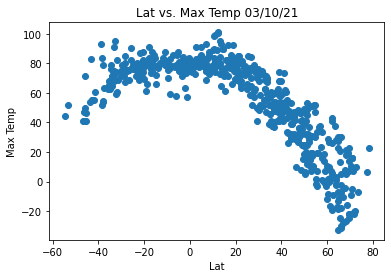

In [79]:
#params to look at
colx = "Lat"
coly = "Max Temp"

# set up x, y and title for plot
x=clean_city_data[colx]
y=clean_city_data[coly]
plot_title = colx +" vs. " + coly

#plot setup
plt.scatter(x,y)
plt.xlabel(colx)
plt.ylabel(coly)
plt.title(plot_title + " "+ date.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{plot_title}_{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}.png')

## Latitude vs. Humidity Plot

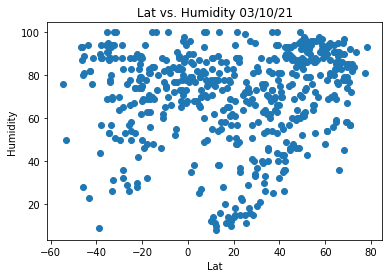

In [80]:
colx = "Lat"
coly = "Humidity"

# set up x, y and title for plot
x=clean_city_data[colx]
y=clean_city_data[coly]
plot_title = colx +" vs. " + coly

#plot setup
plt.scatter(x,y)
plt.xlabel(colx)
plt.ylabel(coly)
plt.title(plot_title + " "+ date.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{plot_title}_{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}.png')

## Latitude vs. Cloudiness Plot

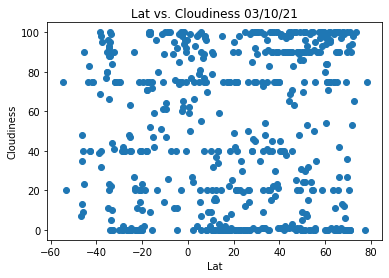

In [81]:
colx = "Lat"
coly = "Cloudiness"

# set up x, y and title for plot
x=clean_city_data[colx]
y=clean_city_data[coly]
plot_title = colx +" vs. " + coly

#plot setup
plt.scatter(x,y)
plt.xlabel(colx)
plt.ylabel(coly)
plt.title(plot_title + " "+ date.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{plot_title}_{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}.png')

## Latitude vs. Wind Speed Plot

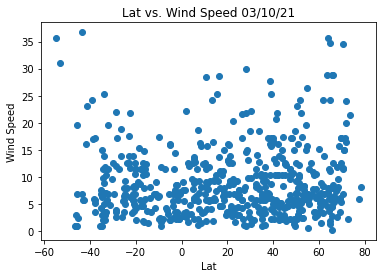

In [93]:
colx = "Lat"
coly = "Wind Speed"

# set up x, y and title for plot
x=clean_city_data[colx]
y=clean_city_data[coly]
plot_title = colx +" vs. " + coly

#plot setup
plt.scatter(x,y)
plt.xlabel(colx)
plt.ylabel(coly)
plt.title(plot_title + " "+ date.today().strftime("%m/%d/%y"))

#Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
plt.savefig(f'./Images/{plot_title}_{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}.png')

## Linear Regression

In [20]:
#Northern hemisphere is latitude greater than 0; Southern hemisphere is latitude less than 0.
#For this exercise, cities with latitude exactly zero will be ignored.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Lat vs. Max Temp 03/10/21')

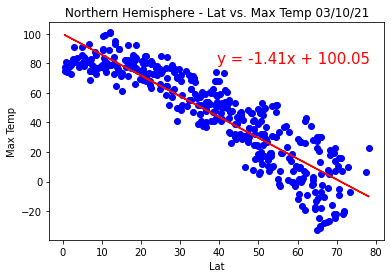

In [63]:
colx = "Lat"
coly = "Max Temp"
#filtered to be applied. With colx, use Latitude >0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]>0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "

#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(x.median(),80),fontsize=15,color="red")

#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ date.today().strftime("%m/%d/%y"))

In [22]:
#expected output

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Max Temp vs. Latitude 03/10/21')

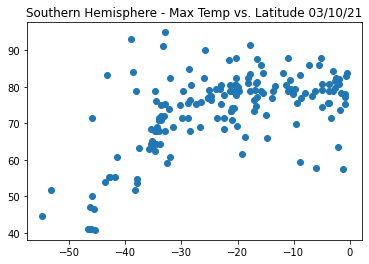

In [23]:
plt.scatter(x=clean_city_data[clean_city_data["Lat"]<0]["Lat"].tolist(),\
            y=clean_city_data[clean_city_data["Lat"]<0]["Max Temp"].tolist())
plt.title("Southern Hemisphere - Max Temp vs. Latitude " + date.today().strftime("%m/%d/%y"))

#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(median(x),median(y)),fontsize=15,color="red")

In [24]:
#expected output

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Humidity (%) vs. Latitude 03/10/21')

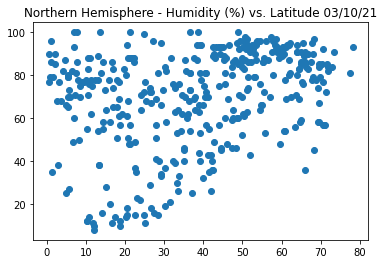

In [25]:
plt.scatter(x=clean_city_data[clean_city_data["Lat"]>0]["Lat"].tolist(),\
            y=clean_city_data[clean_city_data["Lat"]>0]["Humidity"].tolist())
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude " + date.today().strftime("%m/%d/%y"))

#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(median(x),median(y)),fontsize=15,color="red")

In [26]:
#expected output

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Humidity (%) vs. Latitude 03/10/21')

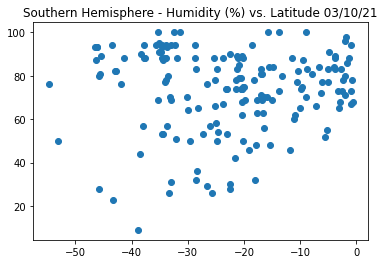

In [27]:
plt.scatter(x=clean_city_data[clean_city_data["Lat"]<0]["Lat"].tolist(),\
            y=clean_city_data[clean_city_data["Lat"]<0]["Humidity"].tolist())
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude " + date.today().strftime("%m/%d/%y"))

#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(median(x),median(y)),fontsize=15,color="red")

In [28]:
#expected output

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Cloudiness (%) vs. Latitude 03/10/21')

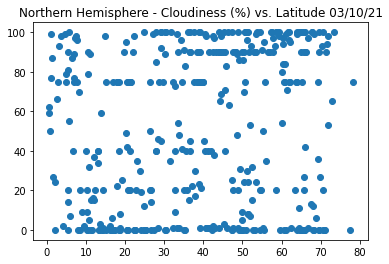

In [29]:
plt.scatter(x=clean_city_data[clean_city_data["Lat"]>0]["Lat"].tolist(),\
            y=clean_city_data[clean_city_data["Lat"]>0]["Cloudiness"].tolist())
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude " + date.today().strftime("%m/%d/%y"))

#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(median(x),median(y)),fontsize=15,color="red")

In [30]:
#expected output

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Cloudiness (%) vs. Latitude 03/10/21')

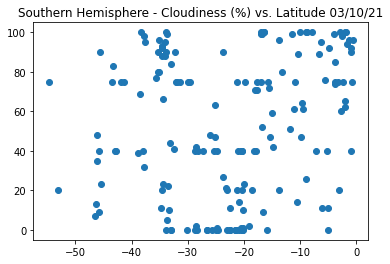

In [31]:
plt.scatter(x=clean_city_data[clean_city_data["Lat"]<0]["Lat"].tolist(),\
            y=clean_city_data[clean_city_data["Lat"]<0]["Cloudiness"].tolist())
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude " + date.today().strftime("%m/%d/%y"))

#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(median(x),median(y)),fontsize=15,color="red")

In [32]:
#expected output

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Northern Hemisphere - Wind Speed (mph) vs. Latitude 03/10/21')

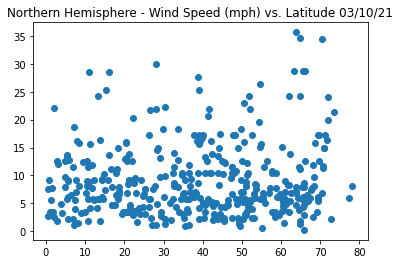

In [33]:
plt.scatter(x=clean_city_data[clean_city_data["Lat"]>0]["Lat"].tolist(),\
            y=clean_city_data[clean_city_data["Lat"]>0]["Wind Speed"].tolist())
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude " + date.today().strftime("%m/%d/%y"))

#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(median(x),median(y)),fontsize=15,color="red")

In [34]:
#expected output

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemisphere - Wind Speed (mph) vs. Latitude 03/10/21')

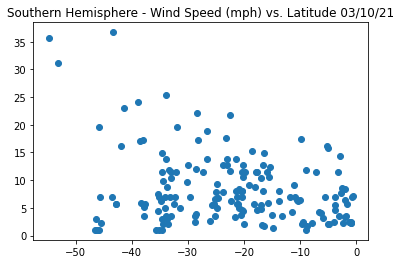

In [35]:
plt.scatter(x=clean_city_data[clean_city_data["Lat"]<0]["Lat"].tolist(),\
            y=clean_city_data[clean_city_data["Lat"]<0]["Wind Speed"].tolist())
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude " + date.today().strftime("%m/%d/%y"))

#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(median(x),median(y)),fontsize=15,color="red")

In [36]:
#expected output